<a href="https://colab.research.google.com/github/wcjona/BMEN_415_Final_Project/blob/main/Classification_Models/Shekinah_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Preprocessing

In [3]:
df = pd.read_csv("/content/Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# Cleaning
df = df.drop_duplicates()
df = df.dropna()
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
# Changing catergories to numerical values
df = df.replace({"low risk": 0, "mid risk":1, "high risk":2})
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [6]:
y = df["RiskLevel"]
x = df.loc[:,df.columns!="RiskLevel"]

x.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [7]:
# Split training and test data

x=(x-x.mean())/x.std()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

# Classification Algorithms

## Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

### Optimization

In [9]:
# Our dataset has 6 features
# n_components is recommended ot be a range from 1 - # of feature

scores = []
for i in range(1,6):
  decisionTree = DecisionTreeClassifier(max_depth=i)
  decisionTree.fit(x_train, y_train)
  score = decisionTree.score(x_test, y_test)
  scores.append(score)

Text(0.5, 0, 'Tree Depth')

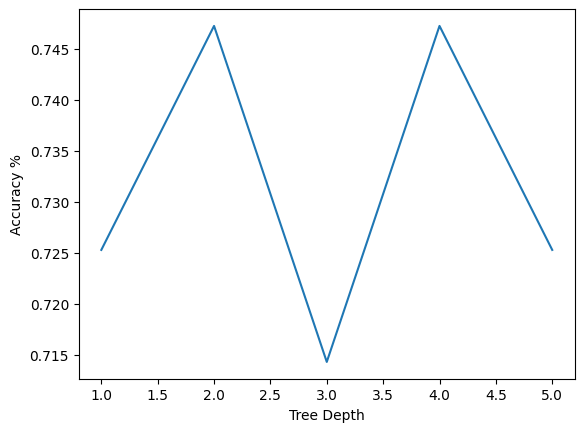

In [10]:
plt.plot(range(1,6), scores)
plt.ylabel("Accuracy %")
plt.xlabel("Tree Depth")

In [11]:
# Fit classification Model
# From optimization above, we can see that the maximum accuracy can be achieved at a tree depth of 2 or 4
decisionTree = DecisionTreeClassifier(max_depth=2)
decisionTree.fit(x_train, y_train)

print("Accuracy: ", decisionTree.score(x_test,y_test)*100)

Accuracy:  74.72527472527473


### Confusion Matrix

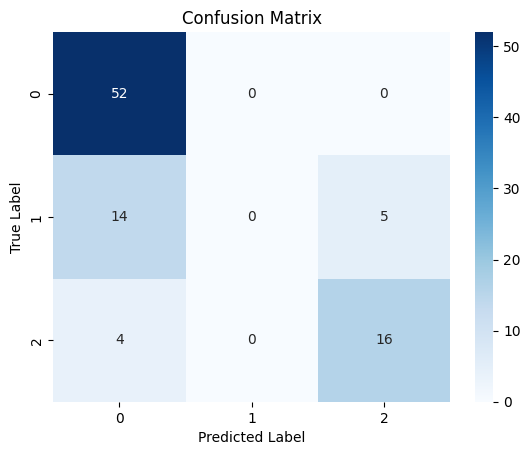

In [12]:
# Make predictions on the test data
y_pred_dt = decisionTree.predict(x_test)

# Define class labels
class_names = np.unique(y_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt, labels=class_names)

# Print the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Optimization


In [14]:
accuracy_list = []
k_list = []

for k in range (1,6):
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(x_train, y_train)

    # Use the trained classifier to make predictions on the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy of the classifier on the test data
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy and k values to their corresponding lists
    accuracy_list.append(accuracy)
    k_list.append(k)

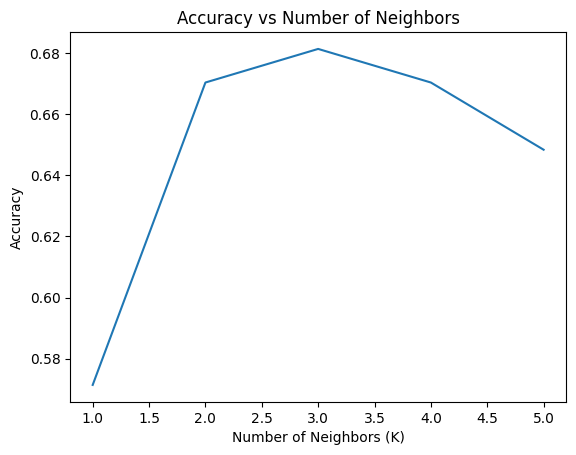

Accuracy:  68.13186813186813 with 3 neighbors


In [15]:
# Plot the accuracy vs number of neighbors
plt.plot(k_list, accuracy_list)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.show()

# Determine the highest accuracy and its corresponding k number of neighbors
highest_accuracy = max(accuracy_list)
best_k = k_list[accuracy_list.index(highest_accuracy)]

print("Accuracy: ", highest_accuracy*100, "with 3 neighbors")

### Confusion Matrix

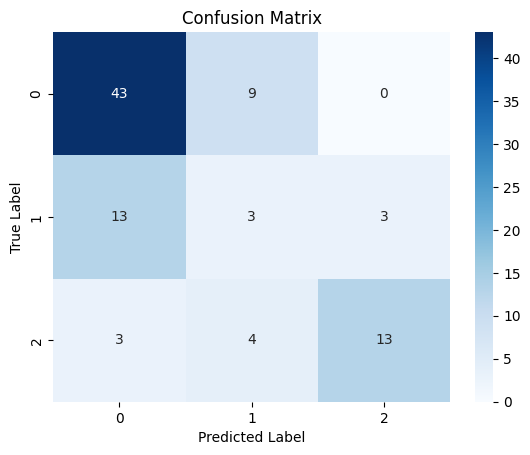

In [16]:
# Make predictions on the test data
y_pred_knn = knn.predict(x_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels=class_names)

# Print the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Neural Nets

In [30]:
from sklearn.neural_network import MLPClassifier

# Create a MLPClassifier object with default hyperparameters
mlp = MLPClassifier(max_iter=100)

# Train the model on the training data
mlp.fit(x_train, y_train)

# Evaluate the model on the testing data
accuracy = mlp.score(x_test, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 76.92307692307693


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix

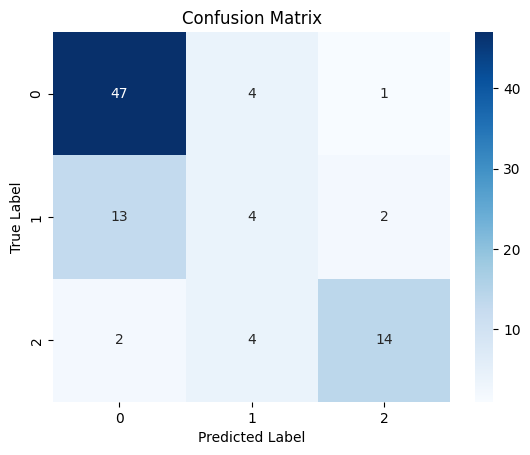

In [18]:
# Make predictions on the test data
y_pred_mlp = mlp.predict(x_test)

# Get the confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred_mlp, labels=class_names)

# Print the confusion matrix with labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()